In [1]:
# Class option definition
import numpy as np


class option(object):

    def __init__(self, S, K, type):
        self.S = S
        self.K = K
        self.t = type
        self.payoff = 0
        self.type = 0

    def numtype(self):
        try:
            a = {'c': 1, 'C': 1, 'p': 2, 'P': 2}
            self.type = a[self.t]
        except:
            print("invalid type")

    def get_payoff(self):
        if self.type != 1 and self.type != 2:
            self.numtype()
        if self.type == 1:
            self.payoff = max(self.S-self.K, 0)
        elif self.type == 2:
            self.payoff = max(self.K-self.S, 0)

In [2]:
# 11.1

def main():
    S0 = 100
    K = np.array([70.0,80.0,90.0,100.0])
    sigma = 0.30
    r = 0.0
    div = 0.08
    T = 1.0
    N = 1.0
    h = T/N
    u = np.exp((r-div)*h+sigma*np.sqrt(h))
    d = np.exp((r-div)*h-sigma*np.sqrt(h))
    pu = (np.exp((r-div)*h)-d)/(u-d)
    pd = 1 - pu
    N = int(N)
    option1 = option(S0, K[0], 'c')
    option2 = option(S0, K[1], 'c')
    option3 = option(S0, K[2], 'c')
    option4 = option(S0, K[3], 'c')
    Tree = np.empty((N+1, N+1, 4), dtype=option)
    Tree[0, 0, 0] = option1
    Tree[0, 0, 1] = option2
    Tree[0, 0, 2] = option3
    Tree[0, 0, 3] = option4
    Tree[0, 0, 0].get_payoff()
    Tree[0, 0, 1].get_payoff()
    Tree[0, 0, 2].get_payoff()
    Tree[0, 0, 3].get_payoff()
    Price = np.zeros((N+1, N+1, 4))
    Payoff = np.zeros((N+1, N+1, 4))
    for k in range(0,4):
        for i in range(1, N+1):
            for j in range(i):
                Tree[j, i, k] = option(Tree[j, i-1, k].S * u, Tree[j, i-1, k].K, Tree[j, i-1, k].t)
                Tree[j, i, k].get_payoff()
            Tree[j+1, i, k] = option(Tree[j, i-1, k].S * d, Tree[j, i-1, k].K,Tree[j, i-1, k].t)
            Tree[j+1, i, k].get_payoff()
    
    for i in range(N+1):
        for j in range(0,4):
            Price[i, N, j] = Tree[i, N, j].payoff
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            Price[j, i, 0] = np.maximum(Tree[j,i,0].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 0] + pd * Price[j+1,i+1, 0]))
            Price[j, i, 1] = np.maximum(Tree[j,i,1].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 1] + pd * Price[j+1,i+1, 1]))
            Price[j, i, 2] = np.maximum(Tree[j,i,2].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 2] + pd * Price[j+1,i+1, 2]))
            Price[j, i, 3] = np.maximum(Tree[j,i,3].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 3] + pd * Price[j+1,i+1, 3]))
    NotReached = True   
    for i in range(0,4):
        for j in range(0,N+1):
            for k in range(0,j+1):
                Payoff[k,j,i] = Tree[k,j,i].payoff
        #print(Payoff[:,:,i])
        #print(Price[:,:,i])
        if Payoff[0,0,i]!=Price[0,0,i] and NotReached:
            print('At {0} and after, the early excercise stops'.format(70+i*10))
            NotReached = False
    
    print('Answer for b & c: as K increase, selling put become more vaulable and inherently, buying call become less valuable')
    print('Both binomial price and base node payoff decrease, but payoff decrease at a faster speed')
    print('This is because there is a OTM path that actually hedged the position')
    print('And vice versa')
            
    
if __name__ == '__main__':
    main()

At 90 and after, the early excercise stops
Answer for b & c: as K increase, selling put become more vaulable and inherently, buying call become less valuable
Both binomial price and base node payoff decrease, but payoff decrease at a faster speed
This is because there is a OTM path that actually hedged the position
And vice versa


In [3]:
# 11.2

def main():
    S0 = 100
    K = np.array([70.0,80.0,90.0,100.0])
    sigma = 0.30
    r = 0.08
    div = 0.08
    T = 1.0
    N = 1.0
    h = T/N
    u = np.exp((r-div)*h+sigma*np.sqrt(h))
    d = np.exp((r-div)*h-sigma*np.sqrt(h))
    pu = (np.exp((r-div)*h)-d)/(u-d)
    pd = 1 - pu
    N = int(N)
    option1 = option(S0, K[0], 'c')
    option2 = option(S0, K[1], 'c')
    option3 = option(S0, K[2], 'c')
    option4 = option(S0, K[3], 'c')
    Tree = np.empty((N+1, N+1, 4), dtype=option)
    Tree[0, 0, 0] = option1
    Tree[0, 0, 1] = option2
    Tree[0, 0, 2] = option3
    Tree[0, 0, 3] = option4
    Tree[0, 0, 0].get_payoff()
    Tree[0, 0, 1].get_payoff()
    Tree[0, 0, 2].get_payoff()
    Tree[0, 0, 3].get_payoff()
    Price = np.zeros((N+1, N+1, 4))
    Payoff = np.zeros((N+1, N+1, 4))
    for k in range(0,4):
        for i in range(1, N+1):
            for j in range(i):
                Tree[j, i, k] = option(Tree[j, i-1, k].S * u, Tree[j, i-1, k].K, Tree[j, i-1, k].t)
                Tree[j, i, k].get_payoff()
            Tree[j+1, i, k] = option(Tree[j, i-1, k].S * d, Tree[j, i-1, k].K,Tree[j, i-1, k].t)
            Tree[j+1, i, k].get_payoff()
    
    for i in range(N+1):
        for j in range(0,4):
            Price[i, N, j] = Tree[i, N, j].payoff
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            Price[j, i, 0] = np.maximum(Tree[j,i,0].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 0] + pd * Price[j+1,i+1, 0]))
            Price[j, i, 1] = np.maximum(Tree[j,i,1].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 1] + pd * Price[j+1,i+1, 1]))
            Price[j, i, 2] = np.maximum(Tree[j,i,2].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 2] + pd * Price[j+1,i+1, 2]))
            Price[j, i, 3] = np.maximum(Tree[j,i,3].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 3] + pd * Price[j+1,i+1, 3]))
    NotReached = True   
    for i in range(0,4):
        for j in range(0,N+1):
            for k in range(0,j+1):
                Payoff[k,j,i] = Tree[k,j,i].payoff
        if Payoff[0,0,i]!=Price[0,0,i] and NotReached:
            print('At {0} and after, the early excercise stops'.format(70+i*10))
            NotReached = False
    
            
    
if __name__ == '__main__':
    main()

At 80 and after, the early excercise stops


In [5]:
# 11.3

def main():
    S0 = 100
    K = np.array([70.0,80.0,90.0,100.0])
    sigma = 0.30
    r = 0.08
    div = 0.0
    T = 1.0
    N = 1.0
    h = T/N
    u = np.exp((r-div)*h+sigma*np.sqrt(h))
    d = np.exp((r-div)*h-sigma*np.sqrt(h))
    pu = (np.exp((r-div)*h)-d)/(u-d)
    pd = 1 - pu
    N = int(N)
    option1 = option(S0, K[0], 'c')
    option2 = option(S0, K[1], 'c')
    option3 = option(S0, K[2], 'c')
    option4 = option(S0, K[3], 'c')
    Tree = np.empty((N+1, N+1, 4), dtype=option)
    Tree[0, 0, 0] = option1
    Tree[0, 0, 1] = option2
    Tree[0, 0, 2] = option3
    Tree[0, 0, 3] = option4
    Tree[0, 0, 0].get_payoff()
    Tree[0, 0, 1].get_payoff()
    Tree[0, 0, 2].get_payoff()
    Tree[0, 0, 3].get_payoff()
    Price = np.zeros((N+1, N+1, 4))
    Payoff = np.zeros((N+1, N+1, 4))
    for k in range(0,4):
        for i in range(1, N+1):
            for j in range(i):
                Tree[j, i, k] = option(Tree[j, i-1, k].S * u, Tree[j, i-1, k].K, Tree[j, i-1, k].t)
                Tree[j, i, k].get_payoff()
            Tree[j+1, i, k] = option(Tree[j, i-1, k].S * d, Tree[j, i-1, k].K,Tree[j, i-1, k].t)
            Tree[j+1, i, k].get_payoff()
    
    for i in range(N+1):
        for j in range(0,4):
            Price[i, N, j] = Tree[i, N, j].payoff
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            Price[j, i, 0] = np.maximum(Tree[j,i,0].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 0] + pd * Price[j+1,i+1, 0]))
            Price[j, i, 1] = np.maximum(Tree[j,i,1].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 1] + pd * Price[j+1,i+1, 1]))
            Price[j, i, 2] = np.maximum(Tree[j,i,2].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 2] + pd * Price[j+1,i+1, 2]))
            Price[j, i, 3] = np.maximum(Tree[j,i,3].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 3] + pd * Price[j+1,i+1, 3]))
    NotReached = True   
    for i in range(0,4):
        for j in range(0,N+1):
            for k in range(0,j+1):
                Payoff[k,j,i] = Tree[k,j,i].payoff
        if Payoff[0,0,i]!=Price[0,0,i] and NotReached:
            if i !=0:
                print('At {0} and after, the early excercise stops'.format(70+i*10))
            else:
                if Payoff[0,0,i]!=Price[0,0,i]:
                    print('No Early Access')
                else:
                    print('At 70 and after, the early exercise stops')
            NotReached = False

            
    
if __name__ == '__main__':
    main()

No Early Access


In [6]:
# 11.4

def main():
    S0 = 100.0
    K = np.array([130.0,120.0,110.0,100.0])
    sigma = 0.30
    r = 0.08
    div = 0.0
    T = 1.0
    N = 1.0
    h = T/N
    u = np.exp((r-div)*h+sigma*np.sqrt(h))
    d = np.exp((r-div)*h-sigma*np.sqrt(h))
    pu = (np.exp((r-div)*h)-d)/(u-d)
    pd = 1 - pu
    N = int(N)
    option1 = option(S0, K[0], 'p')
    option2 = option(S0, K[1], 'p')
    option3 = option(S0, K[2], 'p')
    option4 = option(S0, K[3], 'p')
    Tree = np.empty((N+1, N+1, 4), dtype=option)
    Tree[0, 0, 0] = option1
    Tree[0, 0, 1] = option2
    Tree[0, 0, 2] = option3
    Tree[0, 0, 3] = option4
    Tree[0, 0, 0].get_payoff()
    Tree[0, 0, 1].get_payoff()
    Tree[0, 0, 2].get_payoff()
    Tree[0, 0, 3].get_payoff()
    Price = np.zeros((N+1, N+1, 4))
    Payoff = np.zeros((N+1, N+1, 4))
    for k in range(0,4):
        for i in range(1, N+1):
            for j in range(i):
                Tree[j, i, k] = option(Tree[j, i-1, k].S * u, Tree[j, i-1, k].K, Tree[j, i-1, k].t)
                Tree[j, i, k].get_payoff()
            Tree[j+1, i, k] = option(Tree[j, i-1, k].S * d, Tree[j, i-1, k].K,Tree[j, i-1, k].t)
            Tree[j+1, i, k].get_payoff()
    
    for i in range(N+1):
        for j in range(0,4):
            Price[i, N, j] = Tree[i, N, j].payoff
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            Price[j, i, 0] = np.maximum(Tree[j,i,0].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 0] + pd * Price[j+1,i+1, 0]))
            Price[j, i, 1] = np.maximum(Tree[j,i,1].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 1] + pd * Price[j+1,i+1, 1]))
            Price[j, i, 2] = np.maximum(Tree[j,i,2].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 2] + pd * Price[j+1,i+1, 2]))
            Price[j, i, 3] = np.maximum(Tree[j,i,3].payoff,np.exp(-r*h)*(pu * Price[j,i+1, 3] + pd * Price[j+1,i+1, 3]))
    NotReached = True   
    for i in range(0, 4):
        for j in range(0,N+1):
            for k in range(0,j+1):
                Payoff[k,j,i] = Tree[k,j,i].payoff
        #print(Payoff[:,:,i])
        #print(Price[:,:,i])
        if Payoff[0,0,i]!=Price[0,0,i] and NotReached:
            if i !=0:
                print('At {0} and lower, the early excercise stops'.format(130-i*10))
            else:
                if Payoff[0,0,i]!=Price[0,0,i]:
                    print('No Early Aceess')
                else:
                    print('At 130 and lower, the early exercise stops')
            NotReached = False
    print('For b & c please see 11.1')
    
    
if __name__ == '__main__':
    main()

At 120 and lower, the early excercise stops
For b & c please see 11.1


In [7]:
# 11.7

def main():
    S0 = 100.0
    K = 100.0 
    sigma = np.array([0.30,0.50])
    r = 0.08
    div = 0.0
    T = 1.0
    N = 10.0
    h = T/N
    u = np.exp((r-div)*h+sigma*np.sqrt(h))
    d = np.exp((r-div)*h-sigma*np.sqrt(h))
    pu = (np.exp((r-div)*h)-d)/(u-d)
    pd = 1 - pu
    N = int(N)
    option1 = option(S0, K, 'c')
    option2 = option(S0, K, 'p')
    Tree = np.empty((N+1, N+1, 2, 2), dtype=option)
    Tree[0, 0, 0, :] = option1
    Tree[0, 0, 1, :] = option2
    Tree[0, 0, 0, 0].get_payoff()
    Tree[0, 0, 1, 0].get_payoff()
    Tree[0, 0, 0, 1].get_payoff()
    Tree[0, 0, 1, 1].get_payoff()
    Price = np.zeros_like(Tree, dtype = float)
    Payoff = np.zeros_like(Tree, dtype = float)
    for l in range(0,2):
        for k in range(0,2):
            for i in range(1, N+1):
                for j in range(i):
                    Tree[j, i, k, l] = option(Tree[j, i-1, k, l].S * u[l], Tree[j, i-1, k, l].K, Tree[j, i-1, k, l].t)
                    Tree[j, i, k, l].get_payoff()
                Tree[j+1, i, k, l] = option(Tree[j, i-1, k, l].S * d[l], Tree[j, i-1, k, l].K,Tree[j, i-1, k, l].t)
                Tree[j+1, i, k, l].get_payoff()
    
    for i in range(N+1):
        for j in range(0,2):
            for k in range(0,2):
                Price[i, N, j, k] = Tree[i, N, j, k].payoff
    for i in range(N-1, -1, -1):
        for j in range(i+1):
            Price[j, i, 0, 0] = np.exp(-r*h)*(pu[0] * Price[j,i+1, 0, 0] + pd[0] * Price[j+1,i+1, 0, 0])
            Price[j, i, 1, 0] = np.exp(-r*h)*(pu[0] * Price[j,i+1, 1, 0] + pd[0] * Price[j+1,i+1, 1, 0])
            Price[j, i, 0, 1] = np.exp(-r*h)*(pu[1] * Price[j,i+1, 0, 1] + pd[1] * Price[j+1,i+1, 0, 1])
            Price[j, i, 1, 1] = np.exp(-r*h)*(pu[1] * Price[j,i+1, 1, 1] + pd[1] * Price[j+1,i+1, 1, 1])
    print('The European Call: {0:.3f}, The European Put: {1:.3f}'.format(Price[0,0,0,0],Price[0,0,1,0]))
    print('With 0.50 vol, The European Call: {0:.3f}, The European Put: {1:.3f}'.format(Price[0,0,0,1],Price[0,0,1,1]))
    
    
if __name__ == '__main__':
    main()

The European Call: 15.962, The European Put: 8.274
With 0.50 vol, The European Call: 23.276, The European Put: 15.587


In [8]:
# 11.8 

def main():
    S0 = 100.0
    K = np.array([70.0,80.0,90.0,100.0,110.0,120.0,130.0])
    sigma = 0.30
    r = 0.08
    div = 0.0
    T = 1.0
    N = 10.0
    h = T/N
    u = np.exp((r-div)*h+sigma*np.sqrt(h))
    d = np.exp((r-div)*h-sigma*np.sqrt(h))
    pu = (np.exp((r-div)*h)-d)/(u-d)
    pd = 1 - pu
    N = int(N)
    option1 = option(S0, K[0], 'c')
    option2 = option(S0, K[1], 'c')
    option3 = option(S0, K[2], 'c')
    option4 = option(S0, K[3], 'c')
    option5 = option(S0, K[4], 'c')
    option6 = option(S0, K[5], 'c')
    option7 = option(S0, K[6], 'c')
    Tree = np.empty((N+2, N+2, 7), dtype=option)
    Tree[0, 0, 0] = option1
    Tree[0, 0, 1] = option2
    Tree[0, 0, 2] = option3
    Tree[0, 0, 3] = option4
    Tree[0, 0, 4] = option5
    Tree[0, 0, 5] = option6
    Tree[0, 0, 6] = option7
    for a in Tree[0,0]:
        a.get_payoff()
    Price = np.zeros_like(Tree, dtype = float)
    B = np.zeros_like(Tree, dtype = float)
    delta = np.zeros_like(Tree, dtype = float)
    for k in range(0,7):
        for i in range(1, N+2):
            for j in range(i):
                Tree[j, i, k] = option(Tree[j, i-1, k].S * u, Tree[j, i-1, k].K, Tree[j, i-1, k].t)
                Tree[j, i, k].get_payoff()
            Tree[j+1, i, k] = option(Tree[j, i-1, k].S * d, Tree[j, i-1, k].K,Tree[j, i-1, k].t)
            Tree[j+1, i, k].get_payoff()
    
    for i in range(N+2):
        for j in range(0,7):
            Price[i, N+1, j] = Tree[i, N+1, j].payoff
    for i in range(N, -1, -1):
        for j in range(i+1):
            for k in range(7):
                Price[j, i, k] = np.exp(-r*h)*(pu * Price[j,i+1, k] + pd * Price[j+1,i+1, k])
                B[j,i,k] = np.exp(-r*h)*((u*Price[j,i+1,k]-d*Price[j+1,i+1,k])/(u-d))
                delta[j,i,k] = np.exp(-div*h)*((Price[j,i+1,k]-Price[j+1,i+1,k])/(Tree[j,i,k].S*(u-d)))
    array1 = np.empty((4,7))
    array1[0] = K
    array1[1] = delta[0,0,:]
    array1[2] = B[0,0,:]
    array1[3] = Price[0,0,:]
    print('K,                 delta,         B,             Price')
    print(array1.T)
    
    
if __name__ == '__main__':
    main()

K,                 delta,         B,             Price
[[  70.            0.9462871   132.23212271   36.75111556]
 [  80.            0.87877549  117.60678184   28.93774197]
 [  90.            0.77991645  101.13727153   22.44317501]
 [ 100.            0.67179197   84.24084404   16.45658033]
 [ 110.            0.55451947   68.41447542   12.46308635]
 [ 120.            0.43724697   52.5881068     8.46959237]
 [ 130.            0.34817857   41.54068399    6.40923094]]


[[  9.53229071e-02   1.82141786e+02]
 [  3.40048250e-01   1.28814742e+02]
 [  4.04354756e-01   9.11006651e+01]
 [  1.60274087e-01   6.44284267e+01]]
[[  6.00913694e-04   2.79738009e+02]
 [  6.60713062e-03   2.31392829e+02]
 [  3.26908489e-02   1.91402811e+02]
 [  9.58507959e-02   1.58323990e+02]
 [  1.84431273e-01   1.30961953e+02]
 [  2.43341736e-01   1.08328707e+02]
 [  2.22964719e-01   8.96070076e+01]
 [  1.40087341e-01   7.41208498e+01]
 [  5.77605010e-02   6.13110573e+01]
 [  1.41129964e-02   5.07150924e+01]
 [  1.55174381e-03   4.19503547e+01]]
The probs of 3-period Tree add up to 1.000
The probs of 10-period Tree add up to 1.000


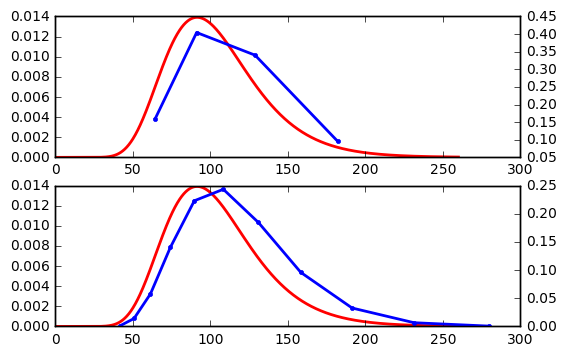

In [9]:

# 11.12

from scipy.stats import binom, lognorm
import matplotlib.pyplot as plt

def main():
    S0 = 100.0
    sigma = 0.30
    r = 0.08
    div = 0.0
    T = 1.0
    N = np.array([3.0,10.0])
    h = T/N
    u = np.exp((r-div)*h+sigma*np.sqrt(h))
    d = np.exp((r-div)*h-sigma*np.sqrt(h))
    pu = (np.exp((r-div)*h)-d)/(u-d)
    pd = 1 - pu
    N = N.astype(int)
    Tree1 = np.zeros((N[0]+1, 2))
    Tree2 = np.zeros((N[1]+1, 2))

    for i in range(N[0]+1):
        Tree1[i, 0] = binom.pmf(i, N[0], pd[0])
        Tree1[i, 1] = S0 * (u[0]**(N[0]-i)) * (d[0]**i)
        
    for i in range(N[1]+1):
        Tree2[i, 0] = binom.pmf(i,N[1],pd[1])
        Tree2[i, 1] = S0 * (u[1]**(N[1]-i)) * (d[1]**i)
    print(Tree1)
    print(Tree2)
    print("The probs of 3-period Tree add up to {0:.3f}".format(np.sum(Tree1[:,0])))
    print("The probs of 10-period Tree add up to {0:.3f}".format(np.sum(Tree2[:,0])))
    x = np.linspace(0, 260, 1000)
    rv = lognorm(s = sigma)
    plt.figure(1)
    plt.subplot(211)
    plt.plot(x, lognorm.pdf(x, sigma, scale = (S0 * np.exp(-div * T))),'r-', lw=2, label='lognorm pdf')
    plt.twinx()
    plt.plot(Tree1[:,1],Tree1[:,0], 'b.-', lw =2)
    plt.subplot(212)
    plt.plot(x, lognorm.pdf(x, sigma, scale = (S0 * np.exp(-div * T))),'r-', lw=2, label='lognorm pdf')
    plt.twinx()
    plt.plot(Tree2[:,1],Tree2[:,0], 'b.-', lw =2)
    plt.show()

    
if __name__ == '__main__':
    main()

In [10]:

# 11.13

from scipy.stats import binom

def main():
    S0 = 100.0
    sigma = 0.30
    r = 0.08
    div = 0.0
    T = 1.0
    N = 50.0
    h = T/N
    u = np.exp((r-div)*h+sigma*np.sqrt(h))
    d = np.exp((r-div)*h-sigma*np.sqrt(h))
    pu = (np.exp((r-div)*h)-d)/(u-d)
    pd = 1 - pu
    N = int(N)
    Tree = np.zeros((N+1, 2))

    for i in range(N+1):
        Tree[i, 0] = binom.pmf(i, N, pd)
        Tree[i, 1] = S0 * (u**(N-i)) * (d**i)
        
    print(Tree)
    print("The probs of 50-period Tree add up to {0:.3f}".format(np.sum(Tree[:,0])))
    ind1 = Tree[:, 1]>120.00
    ind2 = Tree[:, 1]<80.00
    print('The prob > 120.0 is {0:.3f}'.format(np.sum(Tree[ind1,0])))
    print('The prob < 80.0 is {0:.3f}'.format(np.sum(Tree[ind2,0])))
    plt.figure(1)

    
if __name__ == '__main__':
    main()

[[  3.04071636e-16   9.03693749e+02]
 [  1.58624939e-14   8.30175991e+02]
 [  4.05474090e-13   7.62639088e+02]
 [  6.76875267e-12   7.00596481e+02]
 [  8.29797393e-11   6.43601197e+02]
 [  7.96499390e-10   5.91242622e+02]
 [  6.23264320e-09   5.43143549e+02]
 [  4.08745003e-08   4.98957456e+02]
 [  2.29222096e-07   4.58366013e+02]
 [  1.11606327e-06   4.21076786e+02]
 [  4.77417381e-06   3.86821131e+02]
 [  1.81130292e-05   3.55352260e+02]
 [  6.14186126e-05   3.26443460e+02]
 [  1.87312086e-04   2.99886464e+02]
 [  5.16493718e-04   2.75489947e+02]
 [  1.29330763e-03   2.53078147e+02]
 [  2.95172202e-03   2.32489604e+02]
 [  6.15929500e-03   2.13575990e+02]
 [  1.17814297e-02   1.96201047e+02]
 [  2.07023633e-02   1.80239598e+02]
 [  3.34793624e-02   1.65576654e+02]
 [  4.99004766e-02   1.52106577e+02]
 [  6.86286672e-02   1.39732325e+02]
 [  8.71688496e-02   1.28364749e+02]
 [  1.02315020e-01   1.17921954e+02]
 [  1.11019249e-01   1.08328707e+02]
 [  1.11375714e-01   9.95158942e+01]
 